In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy.stats import pearsonr
# Import citipy to determine the cities based on latitude and longitude



In [2]:
# Save path to data set in a variable
pop_2010= "../Data/Census_Data_by_Council_District.csv"



In [3]:
# Use Pandas to read data
pop2010_df = pd.read_csv(pop_2010)
pop2010_df.head(15)


,District,Pop2010,White_pop,Black_pop,Ameri_es_pop,Asian_pop,Hawn_pi_pop,Hispanic_pop,Other_pop,Multi_pop,...,Marhh_chd,Marhh_no_c,Mhh_child,Fhh_child,Families,Avg_family_size,Housing_units,Vacant,Owner_occ,Renter_occ
0,1,245216.22,90857.00,7759.13,2991.73,43397.31,243.41,172971.55,88016.11,11951.53,...,17472.38,12582.79,3923.03,8697.64,51391.85,2.68,85219.33,6204.52,15219.58,63795.23
1,10,261297.85,68458.12,67087.07,2307.88,43148.34,308.11,126872.43,68188.27,11800.07,...,17301.48,14284.08,3736.82,10927.24,57677.78,2.52,103637.46,7721.54,21764.30,74151.62
2,11,250726.93,174020.70,13569.60,1214.43,30132.14,521.02,47243.32,18894.80,12374.24,...,17305.63,24708.30,1874.20,4632.45,55447.15,2.07,123048.13,9183.91,50753.74,63110.49
3,12,258715.95,158939.64,11239.45,1193.56,46815.27,374.43,70827.63,27943.83,12209.77,...,22493.92,26040.98,2137.22,5223.44,63921.59,2.72,90415.80,3683.73,60274.21,26457.86
4,13,247142.04,113391.23,9109.58,2320.07,43740.54,315.72,133038.67,66020.53,12244.39,...,15096.73,14479.35,3100.50,7569.90,49457.04,2.48,102632.78,7725.95,13638.56,81268.27
5,14,248489.10,113548.42,15693.05,2816.77,31591.55,243.26,167529.97,74188.21,10407.84,...,16047.25,13208.00,3017.05,7495.71,47273.89,2.60,85992.89,6787.23,26212.29,52993.37
6,15,251283.55,108150.70,32853.03,2213.40,16305.70,1372.82,156217.43,77268.88,13119.01,...,19513.33,13730.91,3716.83,11151.98,55863.03,2.55,81562.44,5136.14,31668.19,44758.11
7,2,256691.84,158999.91,11463.05,1526.06,17554.92,330.51,115511.82,54814.59,12002.80,...,19249.41,17423.32,3124.50,7409.10,55314.34,2.57,101135.77,6337.16,33612.25,61186.36
8,3,257183.29,155558.89,11669.04,1430.11,30404.92,324.33,95591.32,44526.13,13269.87,...,21684.98,21069.27,2985.33,6800.72,60784.85,2.74,95650.77,6171.92,46723.56,42755.29
9,4,244117.22,169640.22,12524.23,730.64,36798.67,225.96,36760.90,14169.79,10027.72,...,15361.81,21752.67,1844.77,4538.83,50875.22,1.75,130367.28,9377.20,42201.31,78788.78


In [4]:
# Narrow down the dataframe to districts and their respective population

dist_census = pop2010_df [["District", "Pop2010"]]
dist_census


,District,Pop2010
0,1,245216.22
1,10,261297.85
2,11,250726.93
3,12,258715.95
4,13,247142.04
5,14,248489.10
6,15,251283.55
7,2,256691.84
8,3,257183.29
9,4,244117.22


In [5]:
# Rearrange the districts in ascending order from district 1 to 15
sort_dist_census = dist_census.sort_values("District")
sort_dist_census


,District,Pop2010
0,1,245216.22
7,2,256691.84
8,3,257183.29
9,4,244117.22
10,5,252453.38
11,6,262111.74
12,7,256172.52
13,8,245838.53
14,9,248693.15
1,10,261297.85


In [6]:
# Reset the index
sort_dist_census_df = sort_dist_census.reset_index(drop=True)
sort_dist_census_df.head(15)


,District,Pop2010
0,1,245216.22
1,2,256691.84
2,3,257183.29
3,4,244117.22
4,5,252453.38
5,6,262111.74
6,7,256172.52
7,8,245838.53
8,9,248693.15
9,10,261297.85


In [7]:
# Add two new columns named 'Robbery Cases' and 'Homicide Cases' and then include the data from the array retrieved from the developer tool/console 
corr_df = pd.DataFrame({
    "District": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    "Pop2010": [245216.22, 256691.84, 257183.29, 244117.22, 252453.38, 262111.74, 256172.52, 245838.53, 248693.15, 261297.85, 250726.93, 258715.95, 247142.04, 248489.10, 251283.55],
    "Robbery Cases": [6528, 2624, 2800, 2330, 3029, 4205, 2510, 13131, 11530, 8261, 2513, 1926, 7184, 8792, 6007],
    "Homicide Cases": [183, 101, 55, 48, 27, 150, 147, 557, 423, 215, 47, 52, 150, 278, 329]
})
corr_df


,District,Pop2010,Robbery Cases,Homicide Cases
0,1,245216.22,6528,183
1,2,256691.84,2624,101
2,3,257183.29,2800,55
3,4,244117.22,2330,48
4,5,252453.38,3029,27
5,6,262111.74,4205,150
6,7,256172.52,2510,147
7,8,245838.53,13131,557
8,9,248693.15,11530,423
9,10,261297.85,8261,215


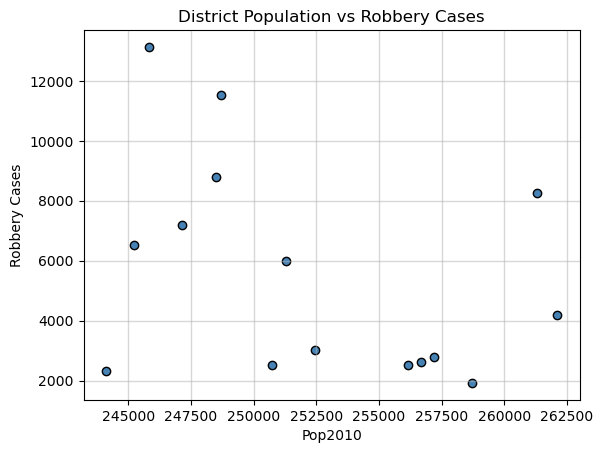

In [8]:
# Build scatter plot for population vs. robbery cases
x_values = corr_df["Pop2010"]
y_values = corr_df["Robbery Cases"]
plt.scatter(x_values, y_values, facecolor="steelblue", edgecolor="black")


# Incorporate other graph properties
plt.xlabel("Pop2010")
plt.ylabel("Robbery Cases")
plt.grid(linestyle='-', linewidth=1, alpha=0.5)
plt.title("Scatter Plot: District Population vs Robbery Cases")

# Save the figure
plt.savefig("../Output_data/Fig1.png")

# Show plot
plt.show()


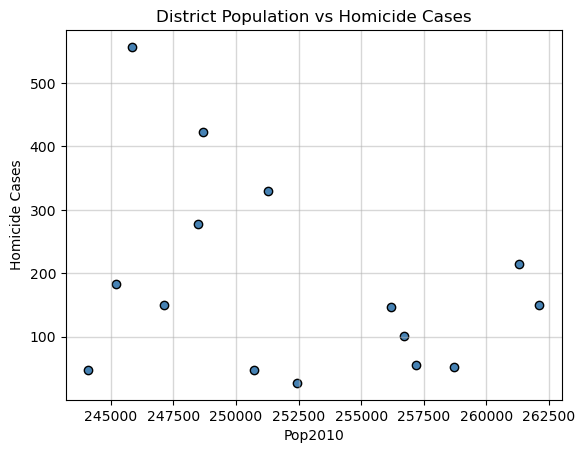

In [9]:
# Build scatter plot for population vs. homicide cases
x_values = corr_df["Pop2010"]
y_values = corr_df["Homicide Cases"]
plt.scatter(x_values, y_values, facecolor="steelblue", edgecolor="black")


# Incorporate other graph properties
plt.xlabel("Pop2010")
plt.ylabel("Homicide Cases")
plt.grid(linestyle='-', linewidth=1, alpha=0.5)
plt.title("Scatter Plot: District Population vs Homicide Cases")

# Save the figure
plt.savefig("../Output_data/Fig2.png")

# Show plot
plt.show()


The r-squared is: 0.15620434262210414


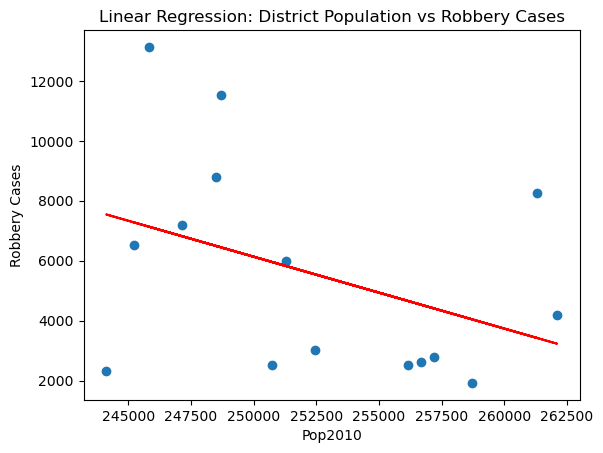

In [12]:
# Print out the r-squared value along with the plot.
x_values = corr_df['Pop2010']
y_values = corr_df["Robbery Cases"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")
plt.xlabel('Pop2010')
plt.ylabel("Robbery Cases")
plt.title("Linear Regression: District Population vs Robbery Cases")
print(f"The r-squared is: {rvalue**2}")
# Save the figure
plt.savefig("../Output_data/Fig3.png")
plt.show()


The r-squared is: 0.11404395435671291


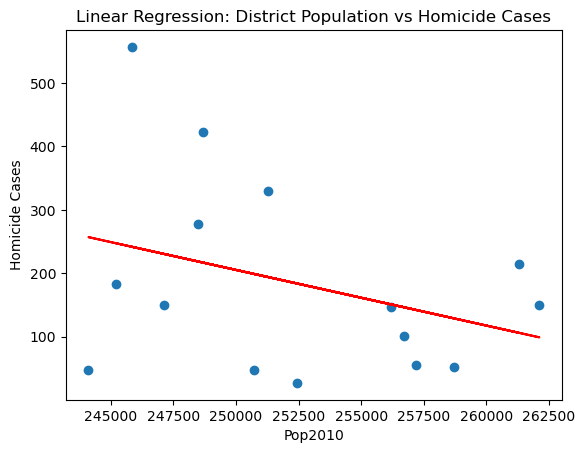

In [13]:
# Print out the r-squared value along with the plot.
x_values = corr_df['Pop2010']
y_values = corr_df["Homicide Cases"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")
plt.xlabel('Pop2010')
plt.ylabel("Homicide Cases")
plt.title("Linear Regression: District Population vs Homicide Cases")
print(f"The r-squared is: {rvalue**2}")
# Save the figure
plt.savefig("../Output_data/Fig4.png")
plt.show()


# Result Summary of the Linear Regression and the R-Squared Values
The relationship between Population vs. Robbery cases, and Population vs Homicide cases in the 15 districts of Los Angeles Cities reveal weak correlation.
The weak correlations are evidenced by the insignificant r-values: 0.15620434262210417 and 0.11404395435671295 respectively.
